In [1]:
from importlib import reload
import models.utils; reload(models.utils)
from models.utils import *
from models.models import wasserstein_loss
from models.GAN import GAN
% matplotlib inline

Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
limit_mem()

In [3]:
from keras.utils.generic_utils import get_custom_objects
metrics_dict = dict([(f.__name__, f) for f in [wasserstein_loss]])
get_custom_objects().update(metrics_dict)

def plot_distribution(exp_id, data_dir='/home/ri27jiz/data/', noise_shape='uniform',
                      unnormalize=False, ylog=False):
    
    # load model and data
    gan = GAN(exp_id=exp_id)
    gan.load_data('radar', data_dir=data_dir, normalize=True, halve_radar=True)
    s = gan.model_dir + exp_id + '_'
    gan.G = keras.models.load_model(s + 'G.h5')
    gan.D = keras.models.load_model(s + 'D.h5')
    gan.compile()
    
    # Get some predictions
    true = np.squeeze(gan.X_train[:1000])
    preds = np.squeeze(gan.G.predict(create_noise(1000, 100, noise_shape)))
    if unnormalize:
        true = un_log_normalize(true)
        preds = un_log_normalize(preds)
    
    # Compute coverage fraction above 0.1 mm
    thresh = 0.1 if unnormalize else un_log_normalize(0.1)
    true_cf = (np.sum(true > thresh, axis=(1, 2)) / (true.shape[1]**2))
    preds_cf = (np.sum(preds > thresh, axis=(1, 2)) / (preds.shape[1]**2))
    
    # Plot figure
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Full distribution on the left
    mx = 50 if unnormalize else 1
    axes[0].hist(np.ravel(true), bins=50, range=(thresh, mx), label='true')
    axes[0].hist(np.ravel(preds), bins=50, range=(thresh, mx), label='preds', alpha=0.5)
    axes[0].set_title('Precipitation distribution')
    # Coverage fraction on the right
    axes[1].hist(true_cf, bins=50, range=(0, 1), label='true')
    axes[1].hist(preds_cf, bins=50, range=(0, 1), label='preds', alpha=0.5)
    axes[1].set_title('Coverage fraction distribution')
    if ylog: [axes[i].set_yscale('log') for i in range(2)]
    plt.tight_layout()
    plt.show()

In [4]:
def plot_results(exp_id, noise_shape='uniform'):
    try:
        plot_losses(exp_id)
        plot_distribution(exp_id, noise_shape=noise_shape)
    except FileNotFoundError:
        print('History file does not exist (yet)')
    if 'mnist' in exp_id:
        plot_mnist_progression(exp_id)
    else:
        plot_radar_progression(exp_id)

In [5]:
def check_status():
    fns = sorted(glob('./images/*'))
    exp_ids = sorted(list(set([fn.split('/')[-1].split('_')[0] for fn in fns])))
    for e in exp_ids:
        epoch = len([fn for fn in fns if e in fn])
        print(e, epoch)

In [6]:
check_status()

mnist1 40
mnist2 40
mnist3 40
mnist4 40
mnist5 40
radar1 4943
radar10 300
radar11 2000
radar12 1393
radar13 550
radar14 200
radar15 200
radar2 300
radar3 500
radar4 500
radar5 500
radar6 500
radar7 300
radar8 300
radar9 300


## MNIST

### MNIST1

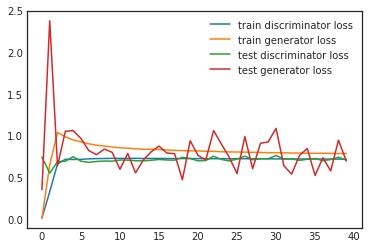

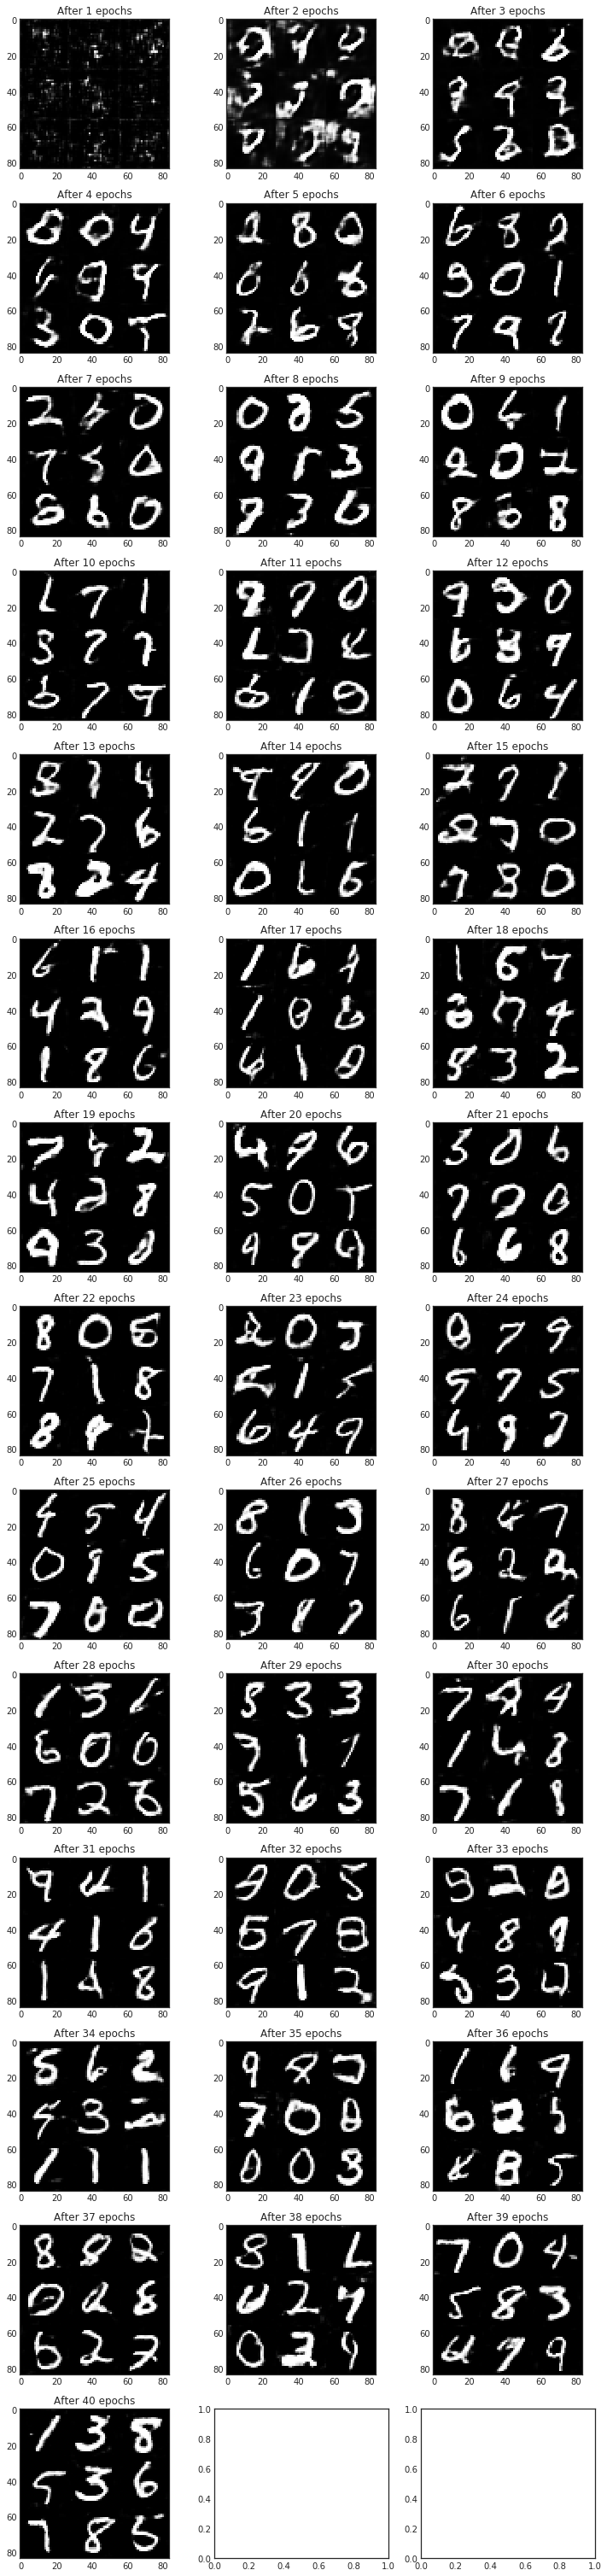

In [40]:
plot_results('mnist1')

### MNIST 2 - Wasserstein

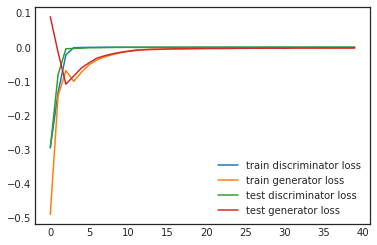

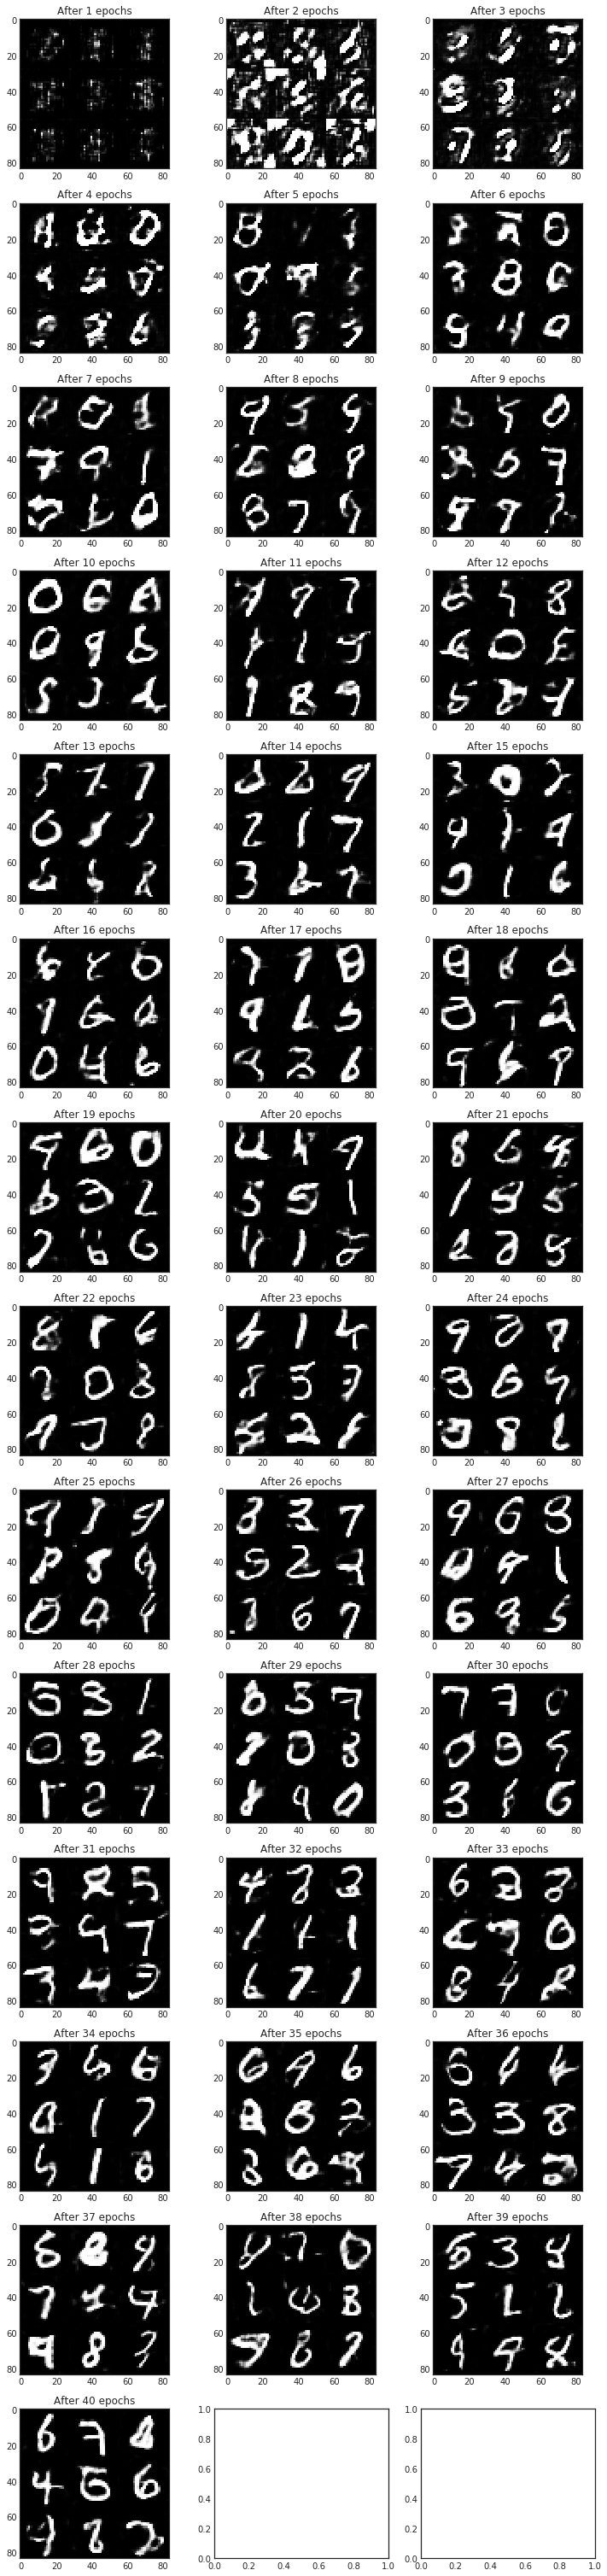

In [99]:
plot_results('mnist2')

### MNIST 3 - More complex

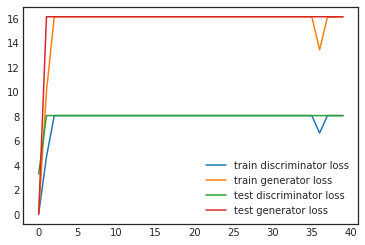

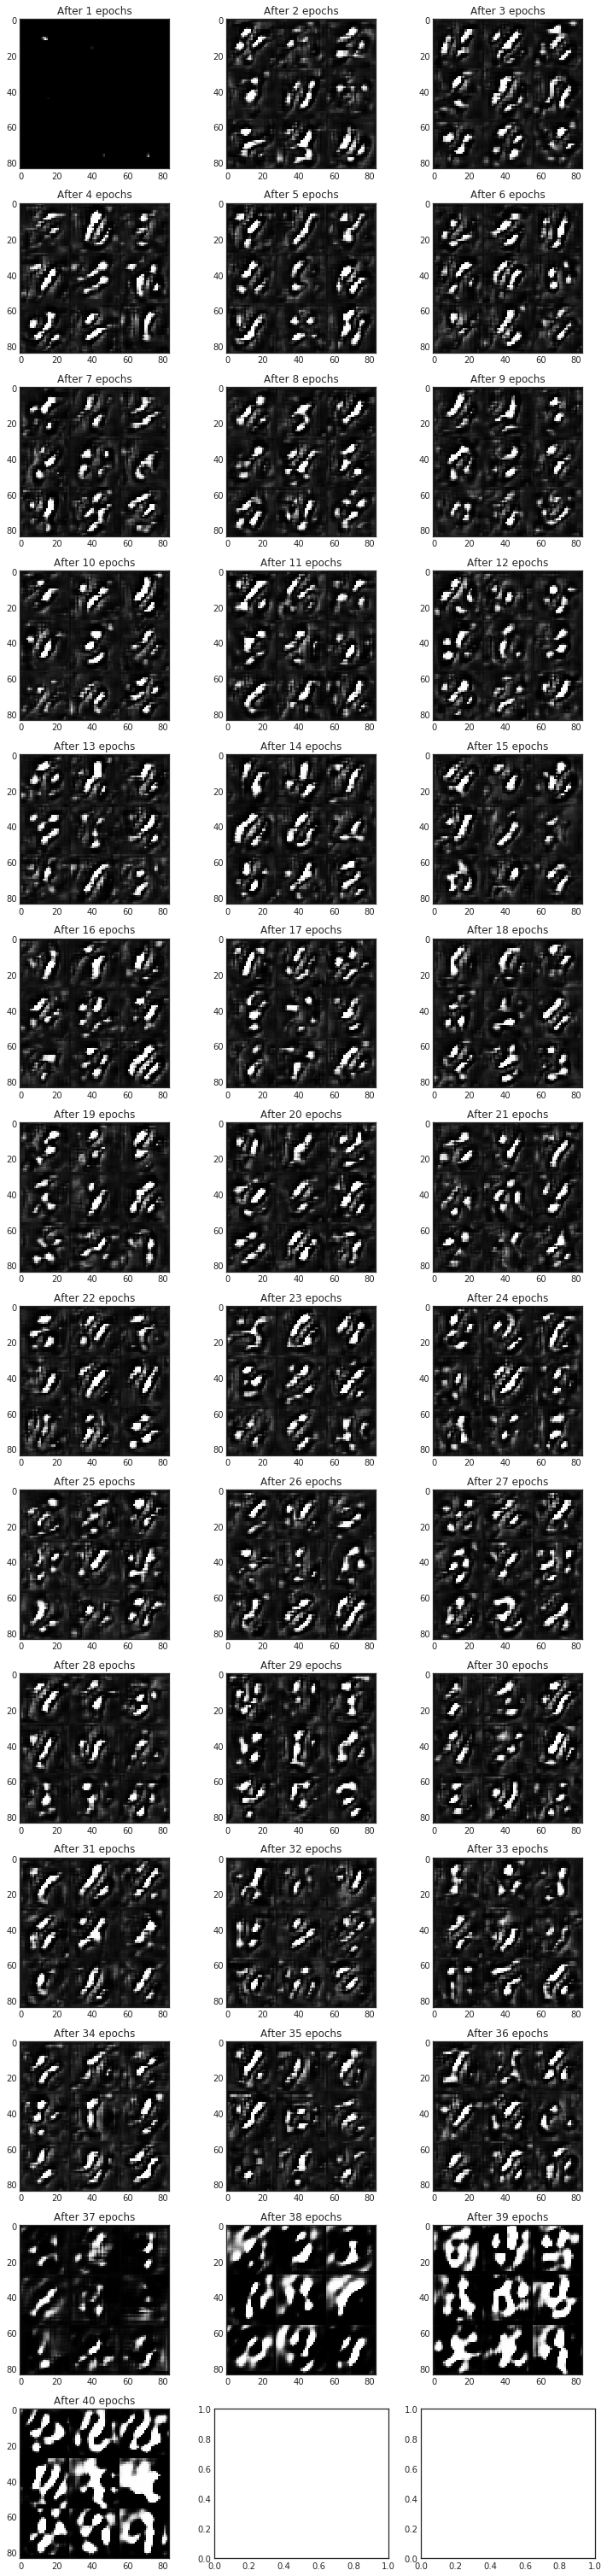

In [70]:
plot_results('mnist3')

### MNIST 4 - Complex Wasserstein

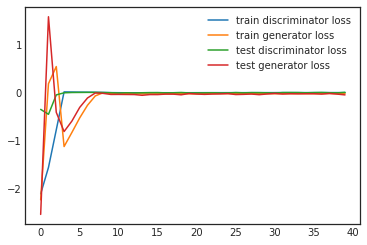

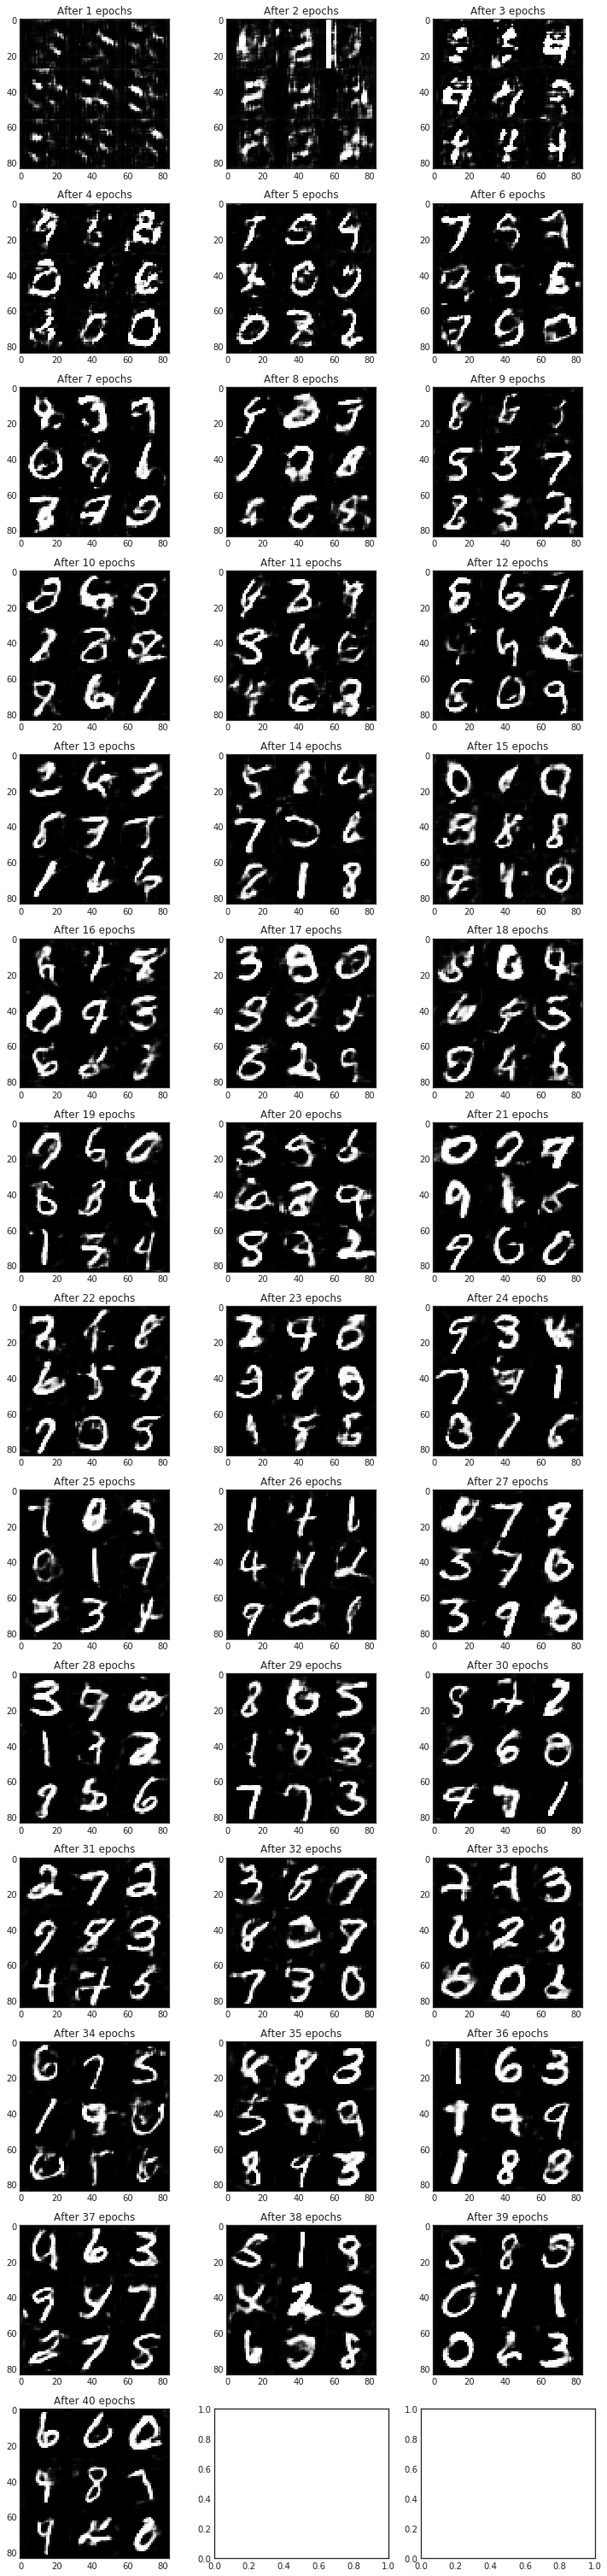

In [107]:
plot_results('mnist4')

### MNIST 5 - Dropout

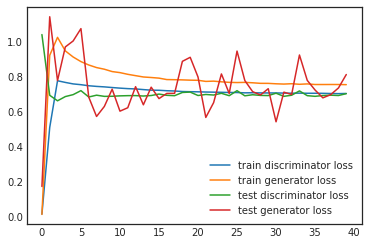

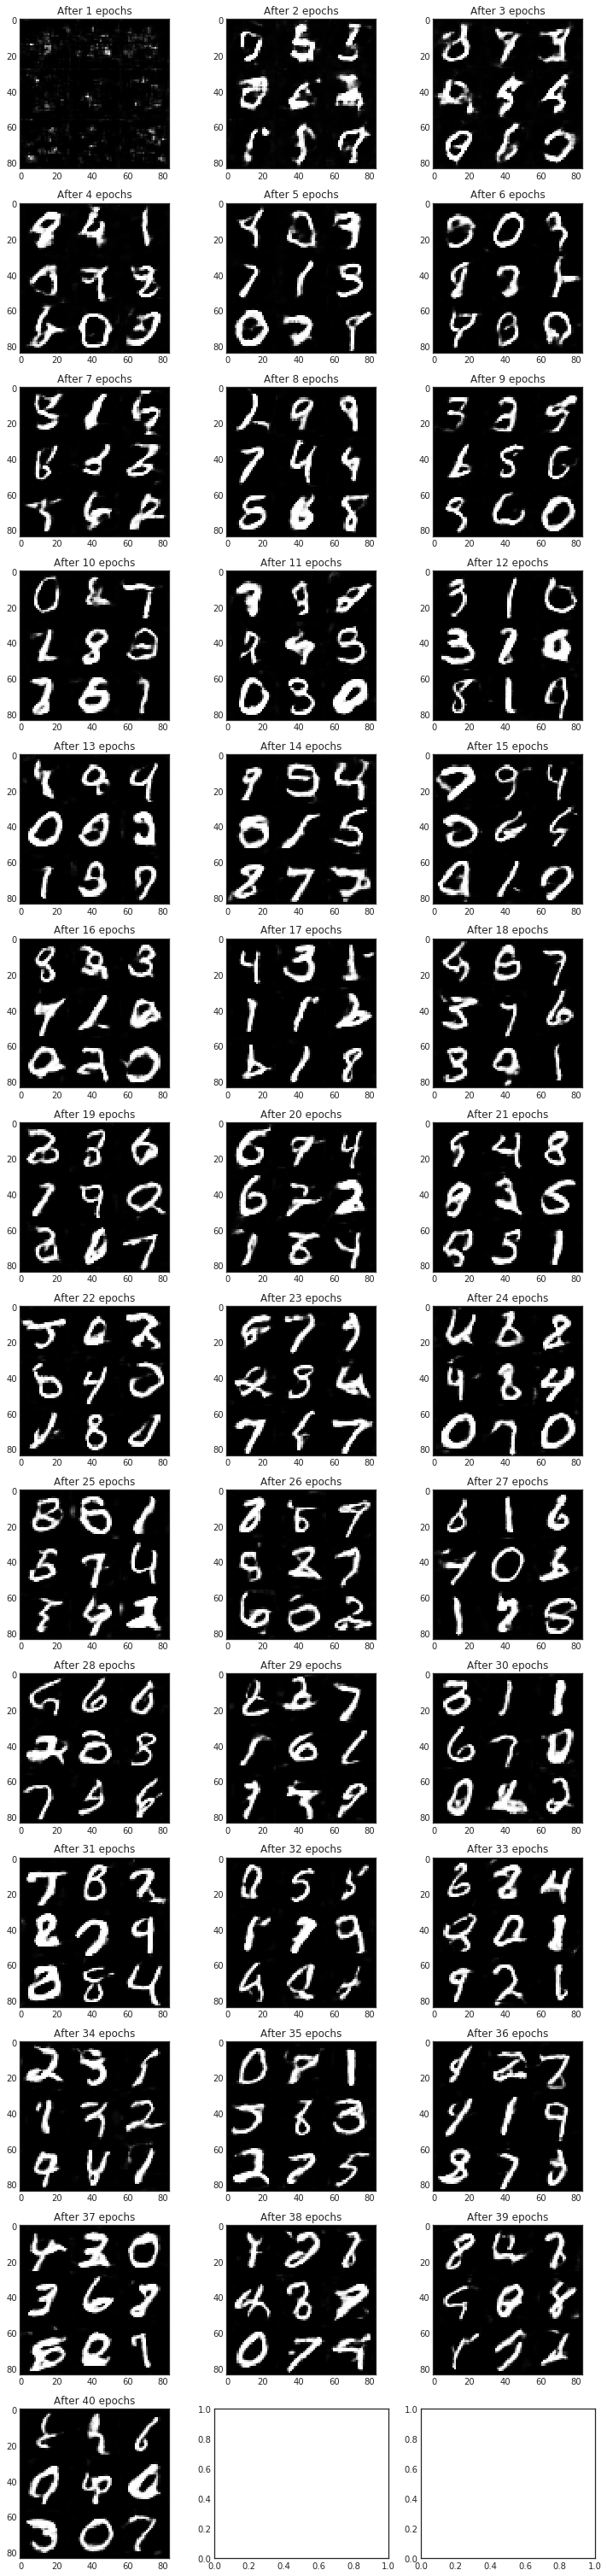

In [44]:
plot_results('mnist5')

## RADAR

### RADAR 1

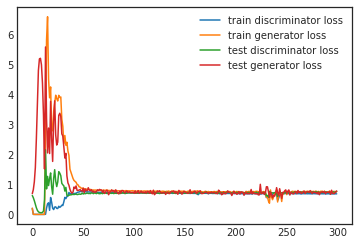

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


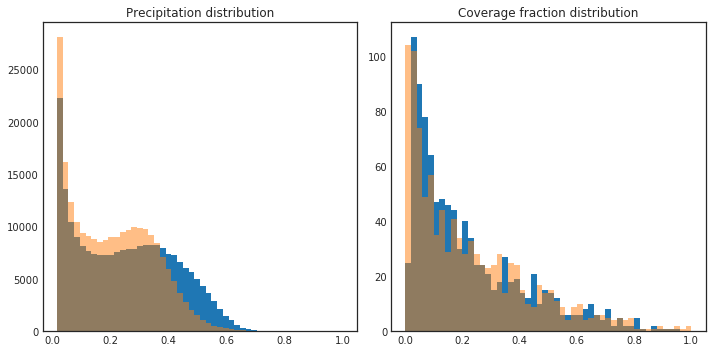

Epoch: 2828


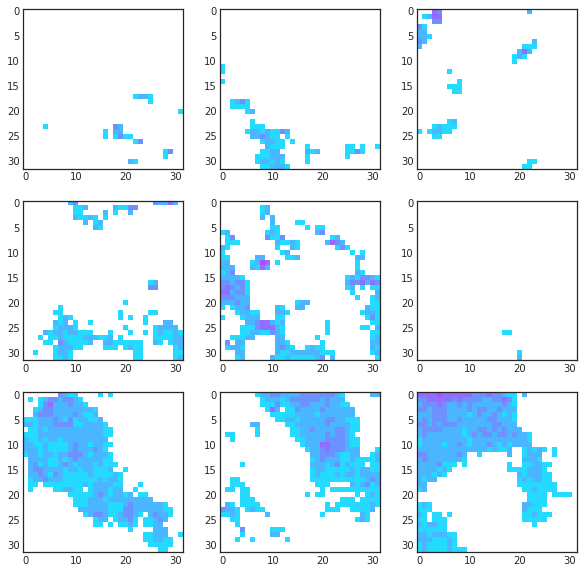

Epoch: 2829


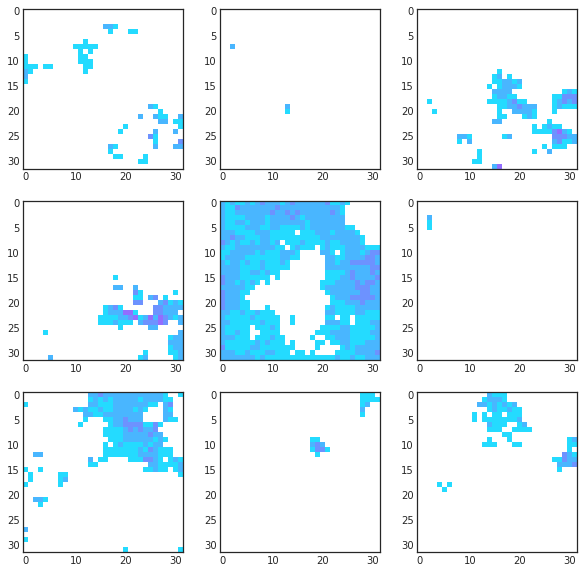

In [7]:
plot_results('radar1')

### RADAR 2 - Wasserstein

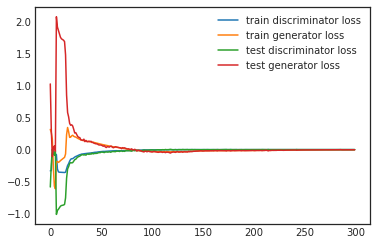

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


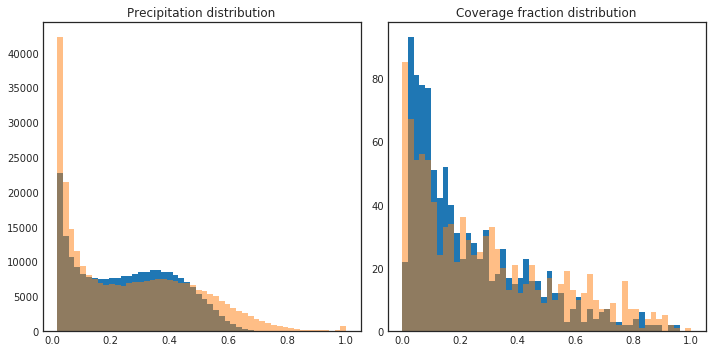

Epoch: 299


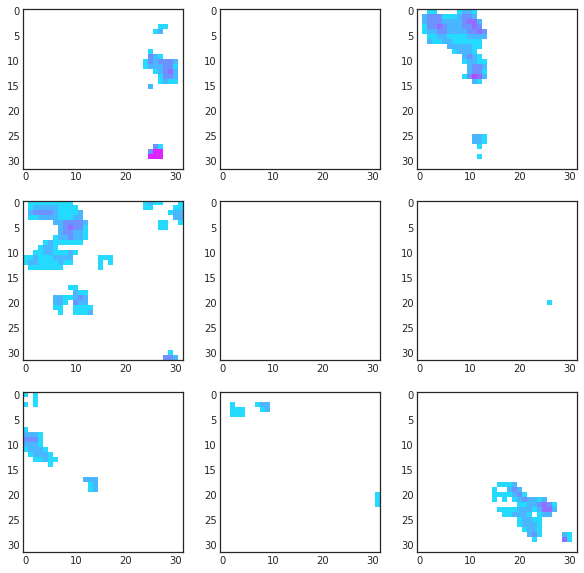

Epoch: 300


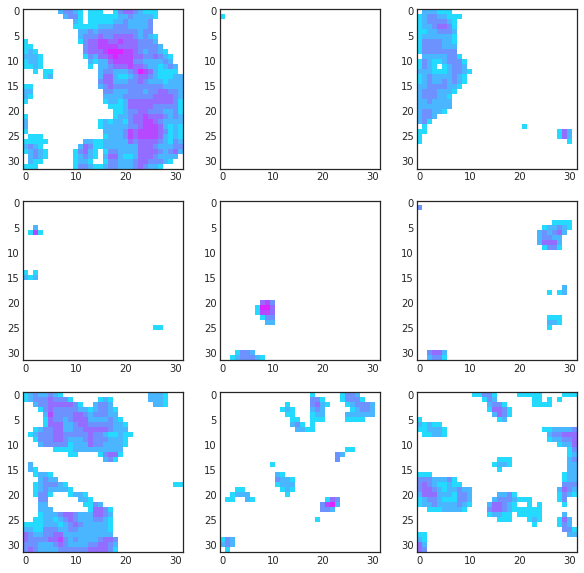

In [8]:
plot_results('radar2')

### RADAR 3 - Complex

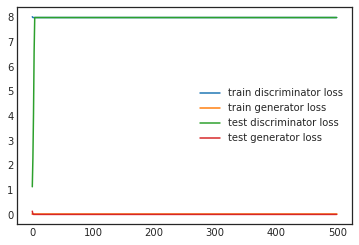

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


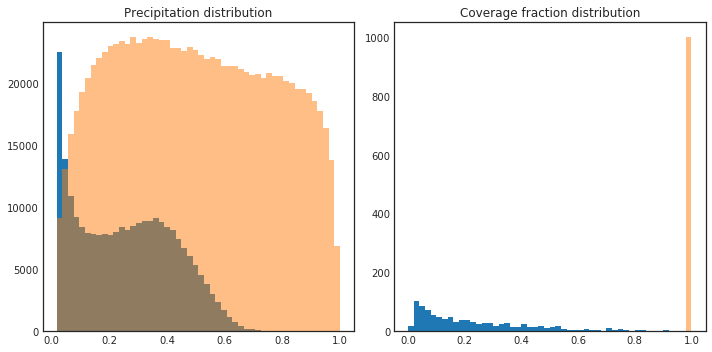

Epoch: 499


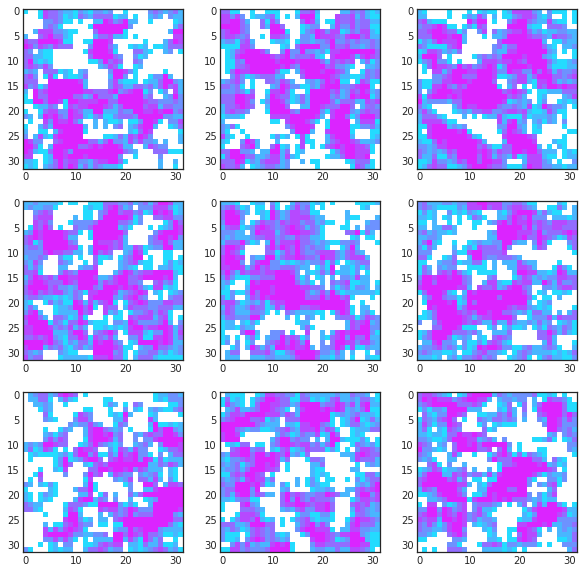

Epoch: 500


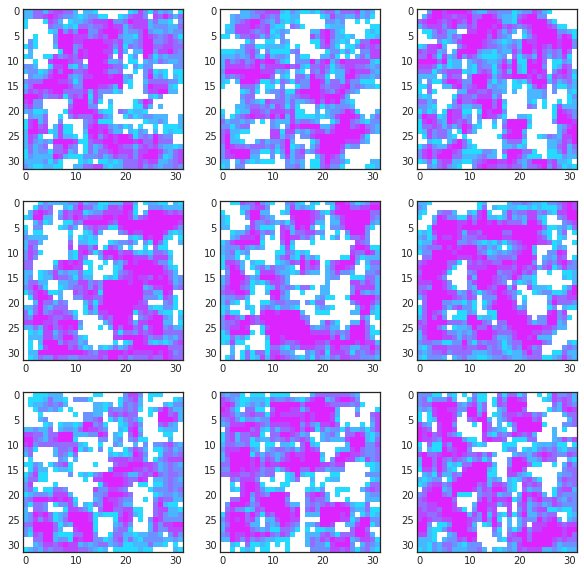

In [9]:
plot_results('radar3')

### RADAR 4 - Complex Wasserstein

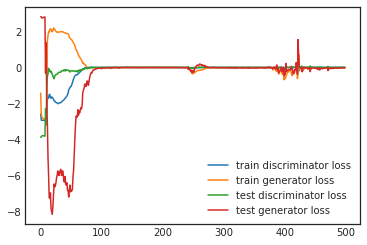

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


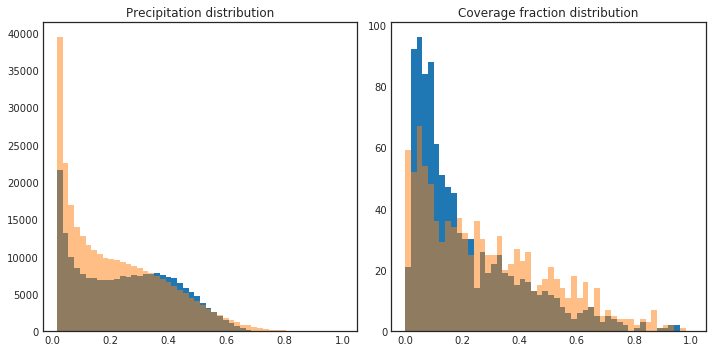

Epoch: 499


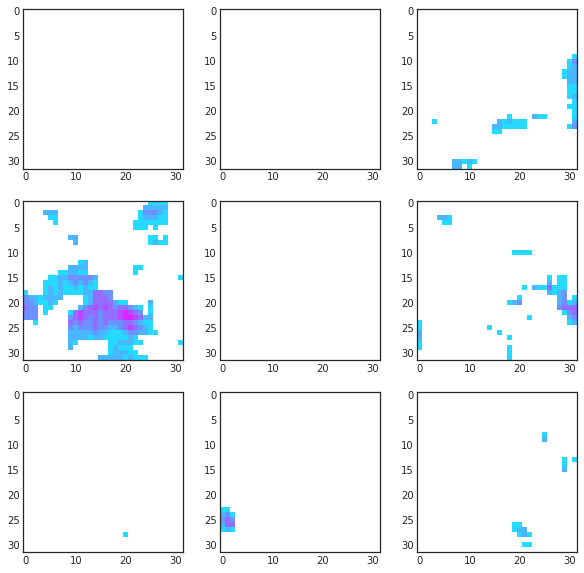

Epoch: 500


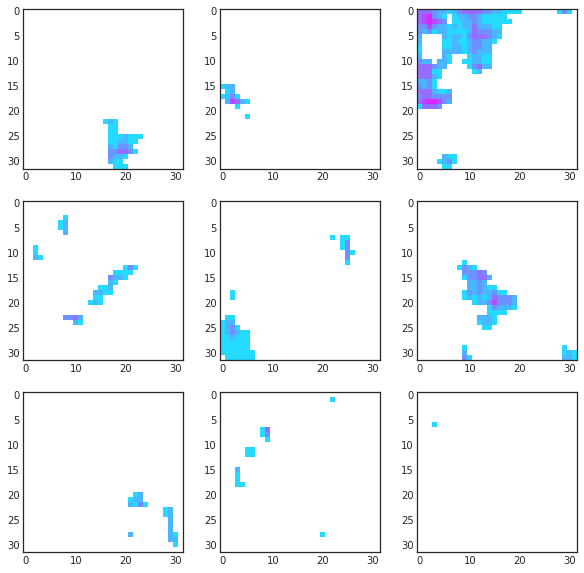

In [10]:
plot_results('radar4')

### RADAR 5 - 64x64 regular

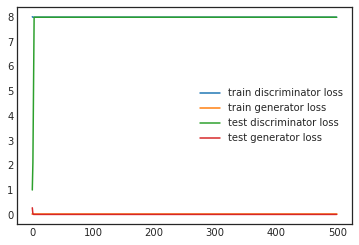

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


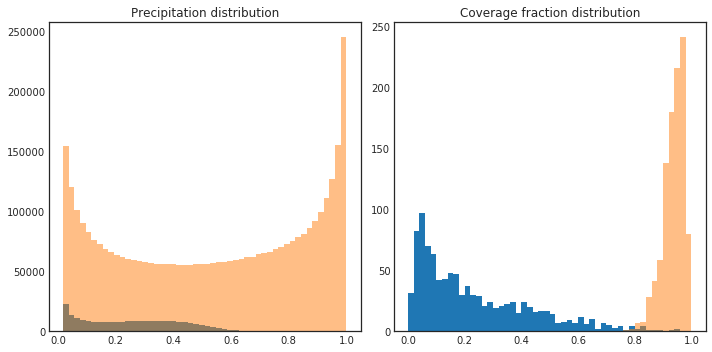

Epoch: 499


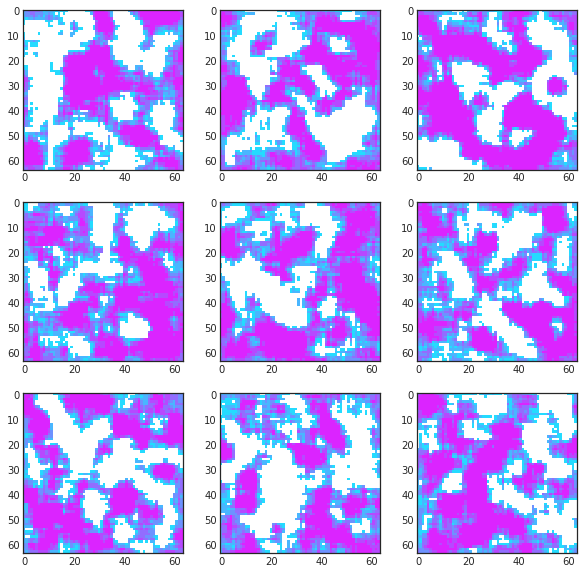

Epoch: 500


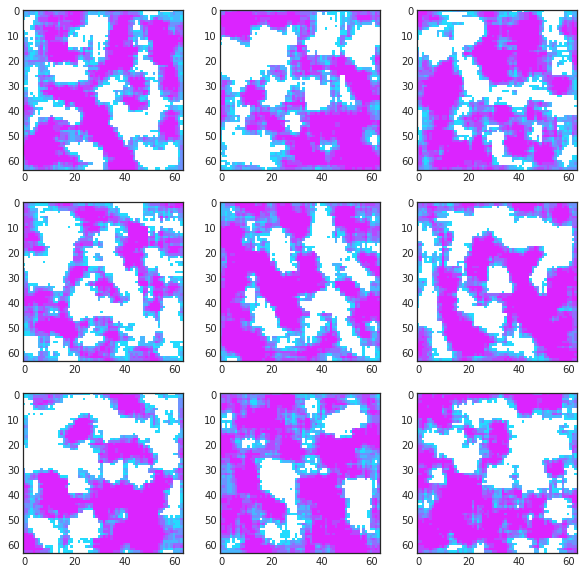

In [11]:
plot_results('radar5')

### RADAR 6 - 64x64 Wasserstein

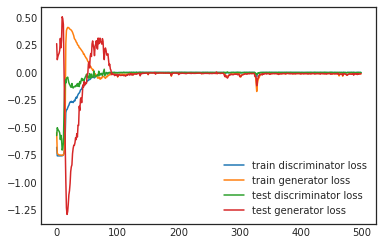

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


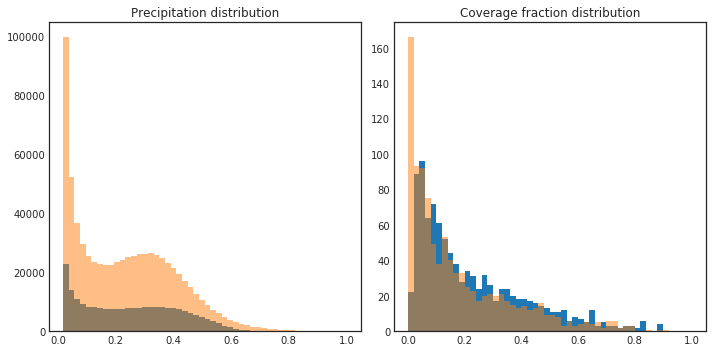

Epoch: 499


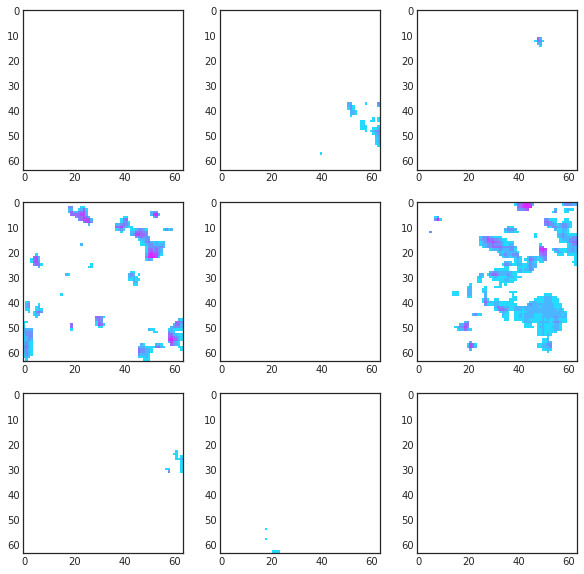

Epoch: 500


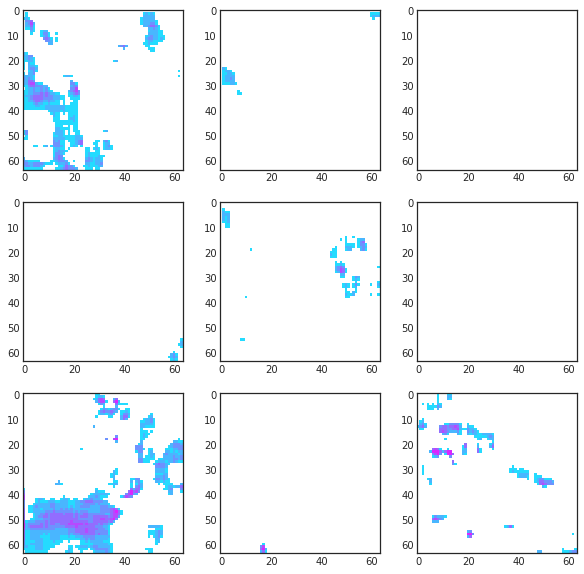

In [7]:
plot_results('radar6')

### RADAR 7 - 3x3 final convolution regular

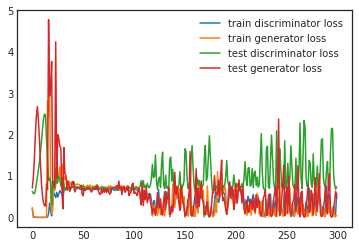

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


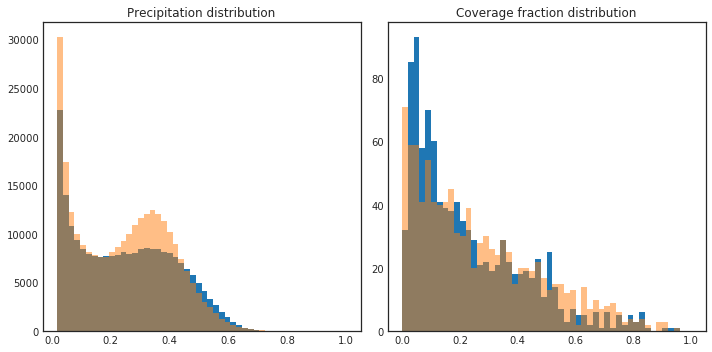

Epoch: 299


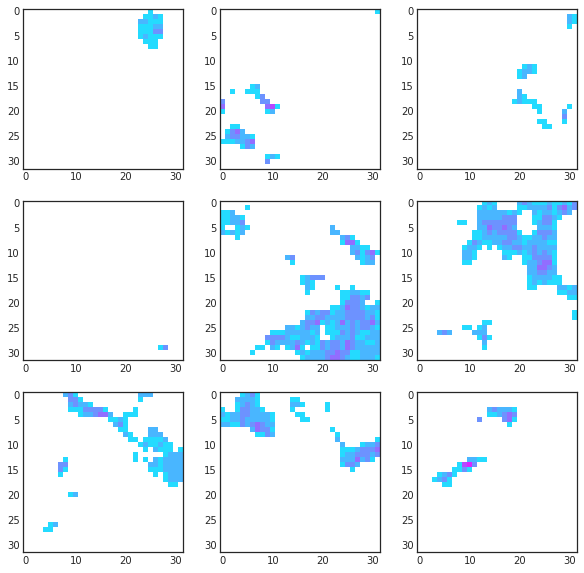

Epoch: 300


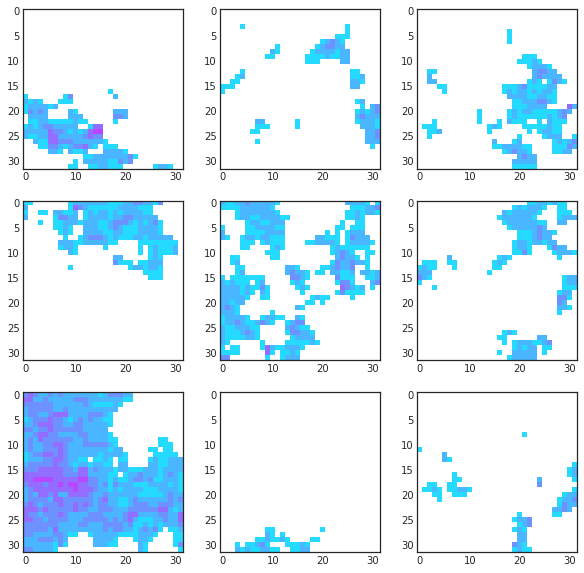

In [13]:
plot_results('radar7')

### RADAR 8 - gaussian noise

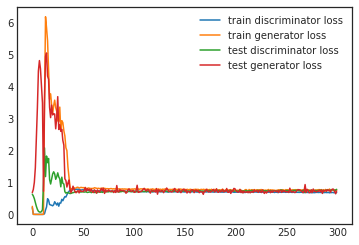

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


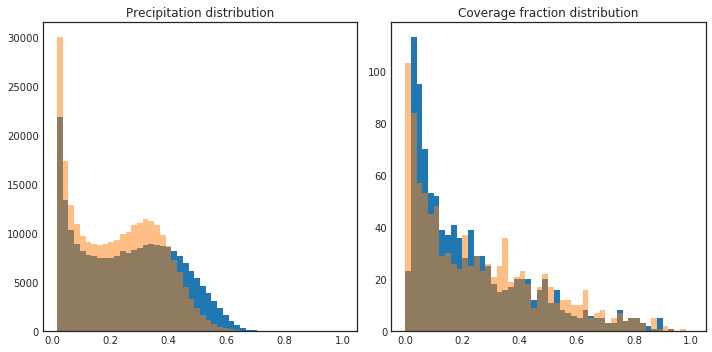

Epoch: 299


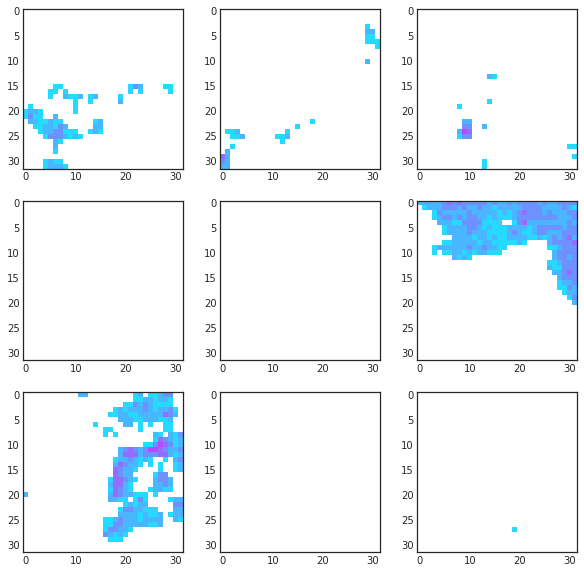

Epoch: 300


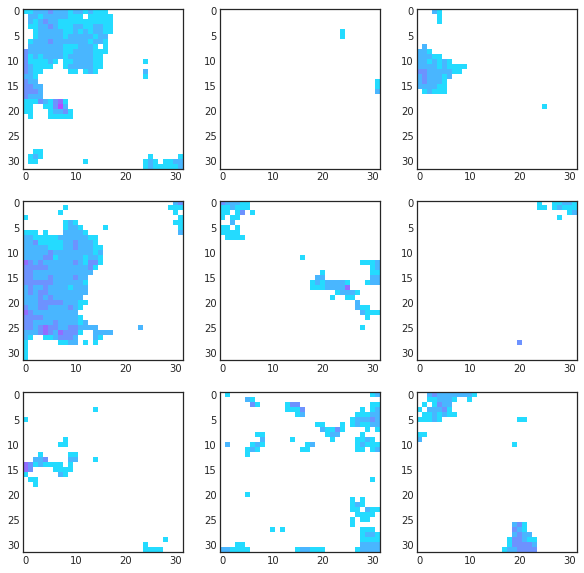

In [20]:
plot_results('radar8', noise_shape='normal')

### RADAR 9 - relu final activation

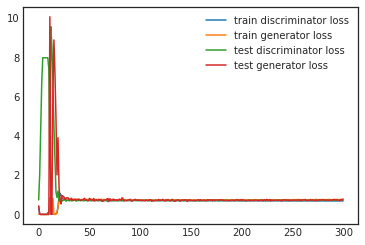

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


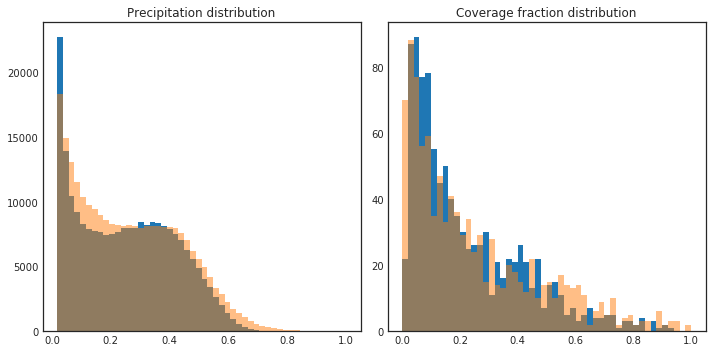

Epoch: 299


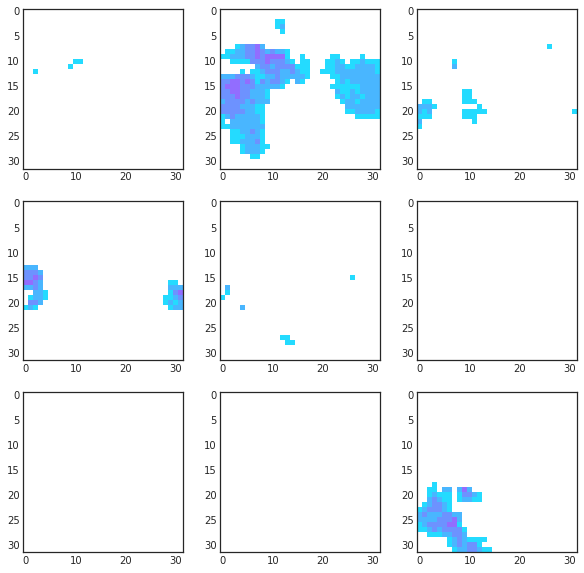

Epoch: 300


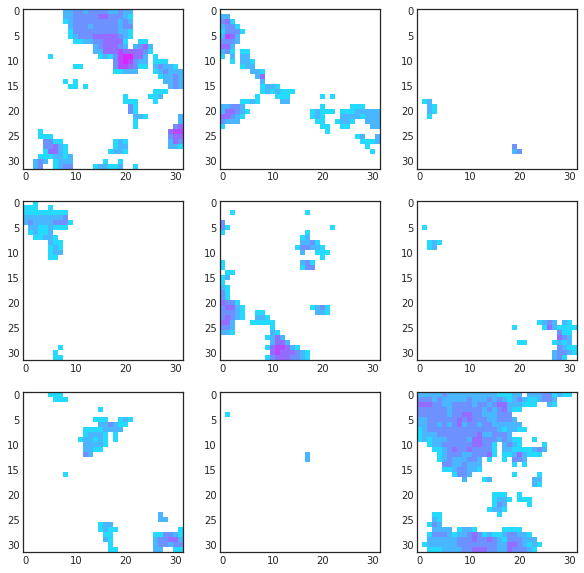

In [15]:
plot_results('radar9')

### RADAR 10 - G dropout

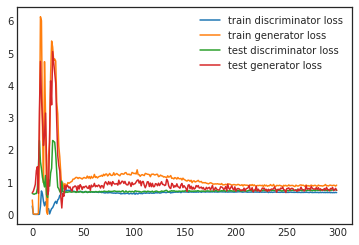

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


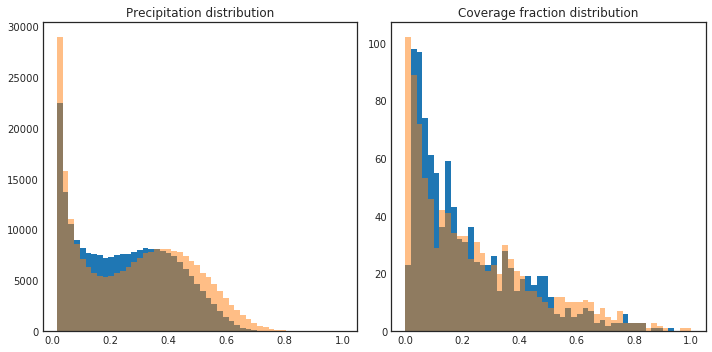

Epoch: 299


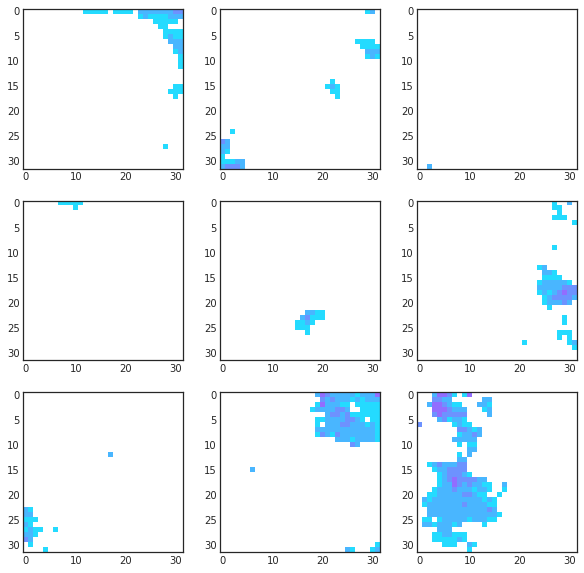

Epoch: 300


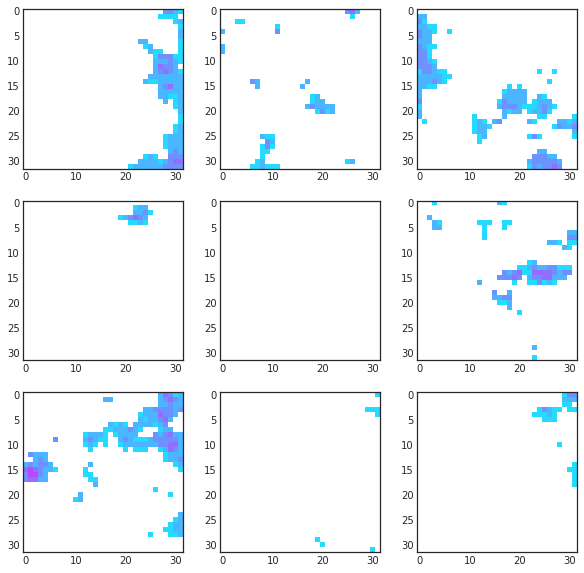

In [16]:
plot_results('radar10')

### RADAR 11 - best non-complex

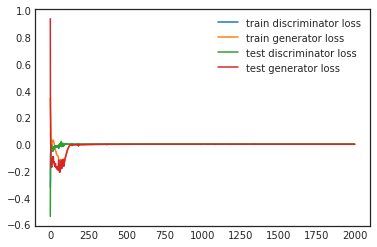

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


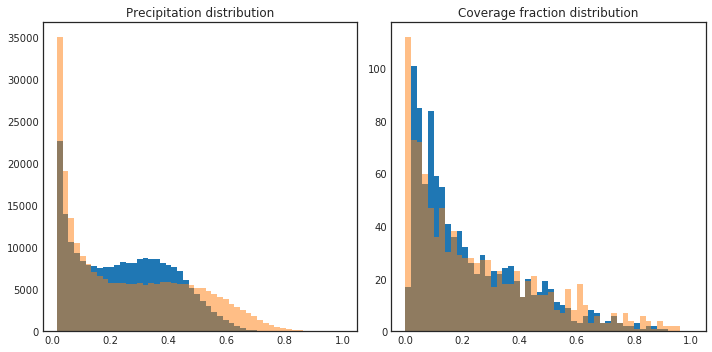

Epoch: 1999


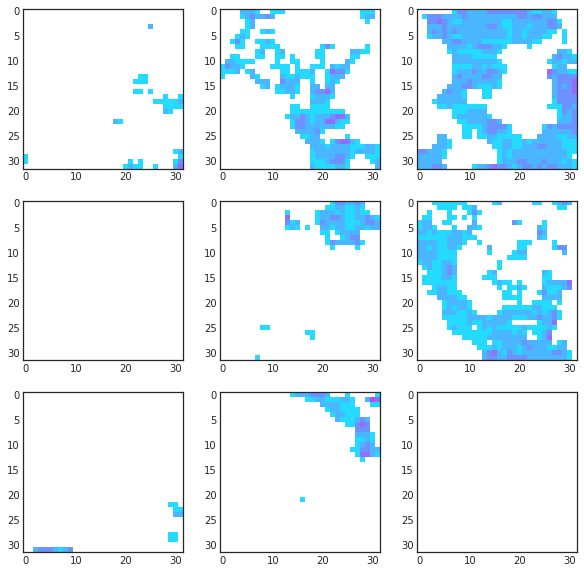

Epoch: 2000


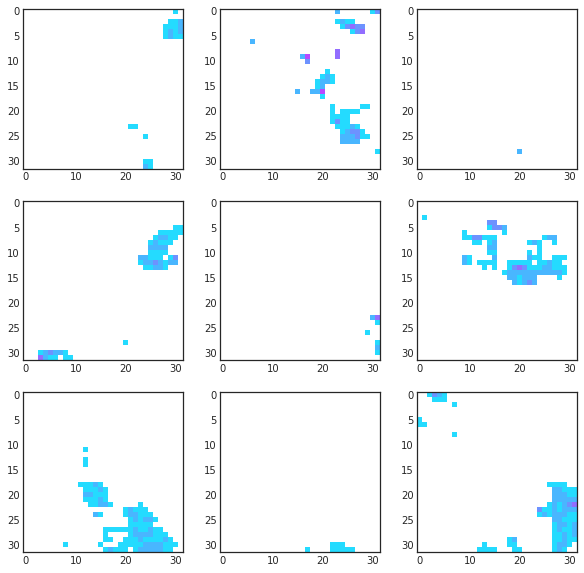

In [9]:
plot_results('radar11', 'normal')

### RADAR 12 -  best complex

History file does not exist (yet)
Epoch: 1392


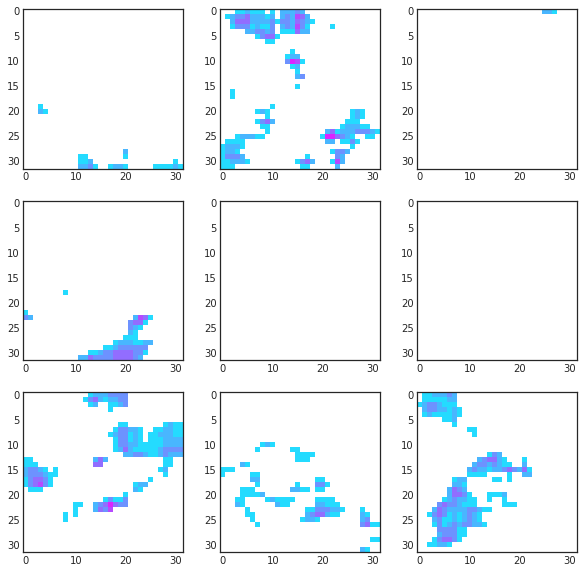

Epoch: 1393


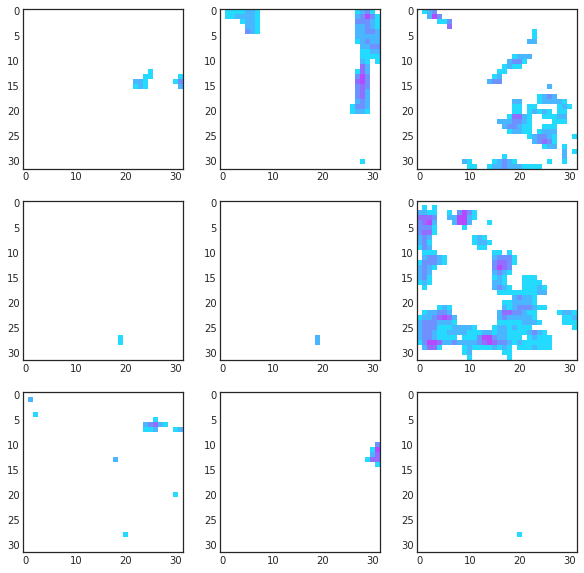

In [10]:
plot_results('radar12', 'normal')

### RADAR 13 -  best 64x64

History file does not exist (yet)
Epoch: 549


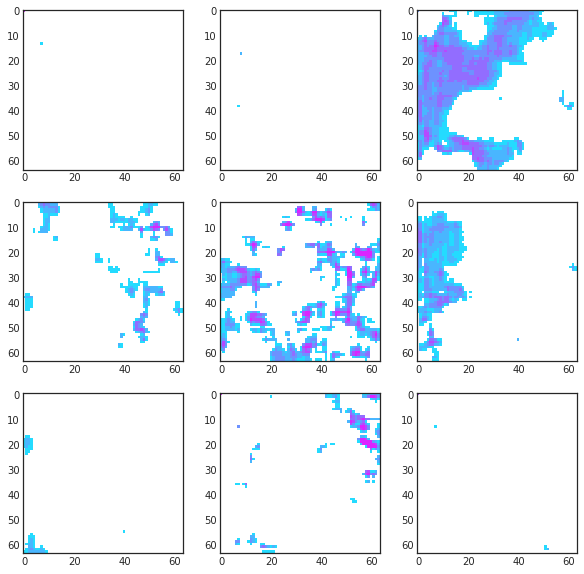

Epoch: 550


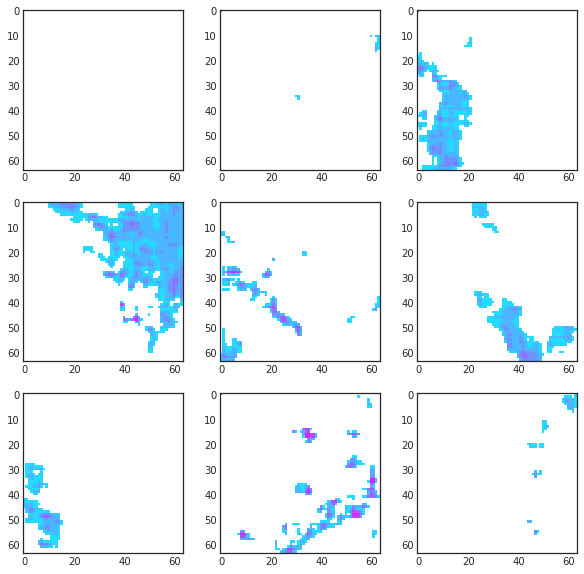

In [12]:
plot_results('radar13', 'normal')

### RADAR 14 -  relu normal 3x3

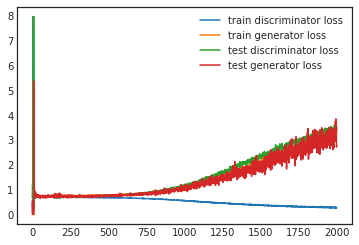

Number of radar stamps: 5682
Train samples: 4546 Test samples: 1136


/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


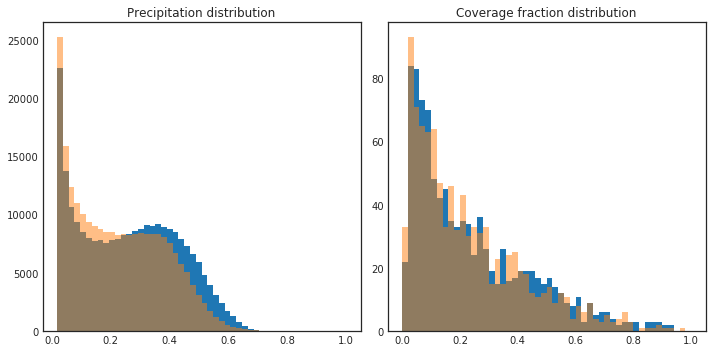

Epoch: 199


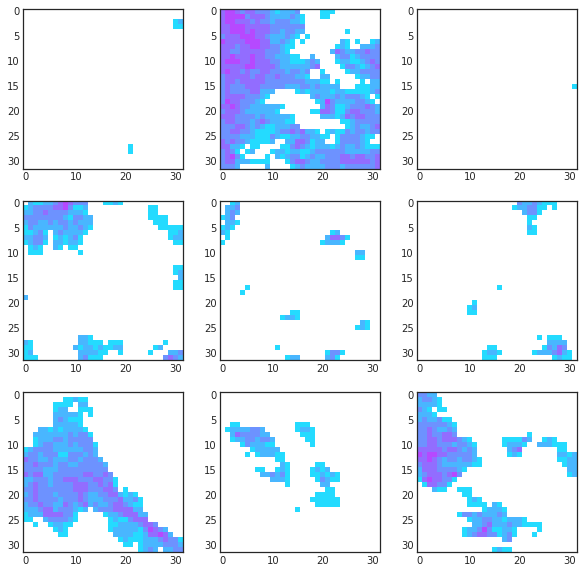

Epoch: 200


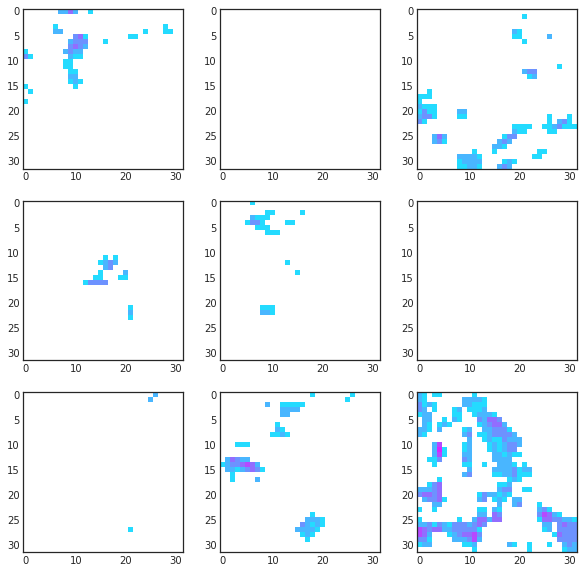

In [14]:
plot_results('radar14', 'normal')

### RADAR 15 -  relu normal 3x3 wasserstein

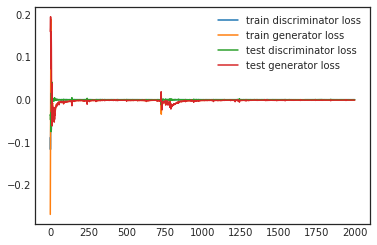

Number of radar stamps: 5682
Train samples: 4546 

/home/ri27jiz/anaconda3/envs/cbrain_gpu/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Test samples: 1136


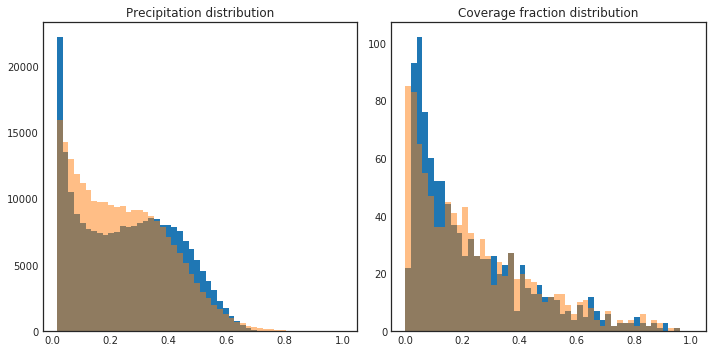

Epoch: 199


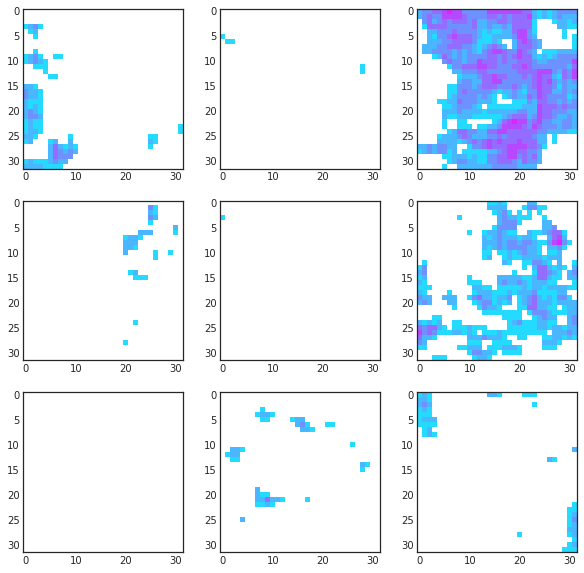

Epoch: 200


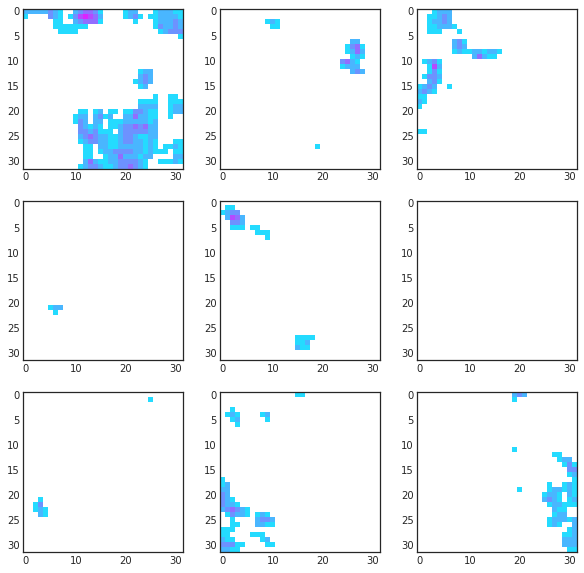

In [15]:
plot_results('radar15', 'normal')